<img src='./img/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='20%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./11_sentinel5p_L2_load_browse.ipynb"><< 11 - Sentinel-5P - Load and browse</a><span style="float:right;"><a href="./20_sentinel3_OLCI_L1_retrieve.ipynb">20 - Sentinel-3 OLCI Level 1 - Retrieve >></a></span>

<div class="alert alert-block alert-success">
<b>EXERCISE WORKBOOK</b>
</div>

# Copernicus Sentinel-5 Precursor (Sentinel-5p) - Carbon Monoxide

This notebook is an `exercise workbook`, where you can practise the data handling with Sentinel-5p data. The exercises base on the workflow introduced in the notebook [Sentinel-5 Level 2 Carbon Monoxide - Load and browse](./11_sentinel5p_L2_load_browse.ipynb). We highly recommend that  you go through this notebook before you do this exercise workbook.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code. Code exercises base on the notebook [Sentinel-5 Level 2 Carbon Monoxide - Load and browse](./11_sentinel5p_L2_load_browse.ipynb).

You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

### Outline
* [1 - Load and browse Sentinel-5p TROPOMI data](#load_s5p)
* [2 - Create a geographical subset](#geographical_subset)
* [3 - Visualize Sentinel-5P Carbon Monoxide data](#visualize_s5p)

<hr>

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import geopandas as gpd

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [2]:
from ipynb.fs.full.functions import visualize_pcolormesh, generate_geographical_subset

<hr>

## <a id="load_s5p"></a>Load and browse Sentinel-5P data

A Sentinel-5p file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5p variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index
* `layer`: this dimension indicates the vertical grid of profile variables

Sentinel-5p data is disseminated in `netCDF`. You can load multiple `netCDF` files at once with the `open_mfdataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5p data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group
- `concat_dim='scanline'`: multiple files will be concatenated based on the scanline dimension
- `combine=nested`: combine a n-dimensional grids into one along each dimension of the grid

Let us load a Sentinel-5p data file as `xarray.Dataset` and inspect the data structure:

In [3]:
s5p = xr.open_mfdataset('./data/sentinel_5p/co/2019/12/29/*', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p

<xarray.Dataset>
Dimensions:                                (corner: 4, ground_pixel: 215, layer: 50, scanline: 8344, time: 1)
Coordinates:
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * time                                   (time) datetime64[ns] 2019-12-29
  * layer                                  (layer) float32 49500.0 ... 500.0
  * scanline                               (scanline) float64 0.0 ... 4.171e+03
    latitude                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    longitude                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
Data variables:
    delta_time                             (time, scanline) datetime64[ns] dask.array<chunksize=(1, 4172), meta=np.ndarray>
    time_utc                               (time, scanline)

<div class="alert alert-block alert-success">
<b>Question:</b><br>
   Can you identify the dimensions of the dataset and description? What data variables are available in the data file?
</div>

**Response**:<br>
The loaded data file has five dimensions:
* `corner`: pixel corner index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `layer`: this dimension indicates the vertical grid of profile variables
* `scanline`: the number of measurements in the granule / along-track dimension index
* `time`: time reference for the data

The following data variables are offered:
* `delta_time`: the offset of individual measurements within the granule, given in milliseconds
* `time_utc`: valid time stamp of the data
* `ga_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
* `carbonmonoxide_total_column`: Vertically integrated CO column density
* `carbonmonoxide_total_column_precision`: Standard error of the vertically integrate CO column

<br>

You can specify one variable of interest and get more detailed information about the variable.


<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Load the data variable `carbonmonoxide_total_column` from the xarray Dataset `file` above and call it `s5p_co`. 
</div>

In [3]:
# Enter your solution here






In [4]:
s5p_co = s5p['carbonmonoxide_total_column']
s5p_co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 8344, ground_pixel: 215)>
dask.array<concatenate, shape=(1, 8344, 215), dtype=float32, chunksize=(1, 4172, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2019-12-29
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
Can you identify the unit of the selected data variable and do you know where it is stored?
</div>

**Response**:

Information about the unit of a data variable is stored as `units` attribute. The unit of **carbonmonoxide_total_column** is `mol m-2`.


<br>

You can do this for the available variables, but also for the dimensions latitude and longitude.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Load the dimensions latitude and longitude of the `s5p_co` DataArray and print them. 
</div>

In [ ]:
# Enter your solution here







In [5]:
print('Latitude')
print(s5p_co.latitude)

print('Longitude')
print(s5p_co.longitude)

Latitude
<xarray.DataArray 'latitude' (time: 1, scanline: 8344, ground_pixel: 215)>
dask.array<concatenate, shape=(1, 8344, 215), dtype=float32, chunksize=(1, 4172, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2019-12-29
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
Longitude
<xarray.DataArray 'longitude' (time: 1, scanline: 8344, ground_pixel: 215)>
dask.array<concatenate, shape=(1, 8344, 215), dtype=float32, chunks

<br>

You can retrieve the array values of the variable with squared bracket: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the one time step from the xarray DataArray <i>s5p_co</i> and call it <b>s5p_co_time</b> 
</div>

In [ ]:
# Enter your solution here






In [6]:
s5p_co_time = s5p_co[0,:,:]
s5p_co_time

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 8344, ground_pixel: 215)>
dask.array<getitem, shape=(8344, 215), dtype=float32, chunksize=(4172, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

The attributes of the data array hold the entry `multiplication_factor_to_convert_to_molecules_percm2`, which is a conversion factor that has to be applied to convert the data from `mol per m2` to `molecules per cm2`.


Additionally, you can save the attributes `longname` and `units`, which you can make use of when visualizing the data.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the following attributes:<br> 
- <b>units</b>,<br>
- <b>long_name</b>, and <br>
- <b>multiplication_factor.</b><br>

Call them <b>units</b>, <b>long_name</b> and <b>multiplication_factor</b> respectively.
</div>

In [12]:
# Enter your solution here







In [7]:
units = s5p_co_time.units
print(units)
long_name = s5p_co_time.long_name
print(long_name)
conversion_factor = s5p_co_time.multiplication_factor_to_convert_to_molecules_percm2
print(conversion_factor)

mol m-2
Vertically integrated CO column
6.022141e+19


<br>

## <a id='geographical_subset'></a>Create  a geographical subset

You can zoom into a region by specifying a `bounding box` of interest. Let's set the extent to southeast Australia.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Create a geographical subset for southeast Australia. Make use of the function <a href='./functions.ipynb#generate_geographical_subset'>generate_geographical_subset</a> and call the new DataArray **s5p_co_subset**.<br>

The bounding box information can be the following:<br>
- **latmin=-50**
- **latmax=-19**
- **lonmin=130**
- **lonmax=170**

<b>HINT:</b><br> With `?generate_geographical_subset`, you can see what keyword arguments the function requires.

</div>

In [47]:
?generate_geographical_subset

In [ ]:
# Enter your solution here







In [9]:
s5p_co_subset = generate_geographical_subset(
    s5p_co_time,
    latmin=-50,
    latmax=-19,
    lonmin=130,
    lonmax=170)
s5p_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 1462, ground_pixel: 215)>
dask.array<where, shape=(1462, 215), dtype=float32, chunksize=(768, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
  * scanline      (scanline) float64 1.523e+03 1.524e+03 ... 2.192e+03 2.193e+03
    latitude      (scanline, ground_pixel) float32 -52.41825 ... -14.701418
    longitude     (scanline, ground_pixel) float32 155.38628 ... 151.31766
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

How many entries for `scanline` does the DataArray **s5p_co_subset** have compared to the DataArray **s5p_co_time**?
</div>

**Response**

The scanline entries have reduced from formerly `8344` to now `1462` values.

<br>

## <a id="plotting_s5p"></a>Plotting example - Sentinel-5P data

You can plot data arrays of type `numpy` with matplotlib's `pcolormesh` function. In combination with the library [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality maps. 

In order to make it easier to visualize the Carbon Monoxide values, we apply the conversion factor to the DataArray. This converts the Carbon Monoxide values from mol per m<sup>2</sup> to molecules per cm<sup>2</sup>.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Convert the data values of the subsetted DataArray to `molecules per cm-2` by multiplying the DataArray with the multiplication factor.


In [ ]:
# Enter your solution here








In [10]:
s5p_co_converted = s5p_co_subset*conversion_factor
s5p_co_converted

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 1462, ground_pixel: 215)>
dask.array<mul, shape=(1462, 215), dtype=float32, chunksize=(768, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
  * scanline      (scanline) float64 1.523e+03 1.524e+03 ... 2.192e+03 2.193e+03
    latitude      (scanline, ground_pixel) float32 -52.41825 ... -14.701418
    longitude     (scanline, ground_pixel) float32 155.38628 ... 151.31766

<br>

For visualization, you can use the function [visualize_pcolormesh](./functions#visualize_pcolormesh) to visualize the data. The following kwargs have to be defined:
* `xarray DataArray`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `longname`
* `vmin`, `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `log`
* `set_global`

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Let us apply the [visualize_pcolormesh](./functions#visualize_pcolormesh) function and visualize the vertically integrated carbon monoxide column sensored from the Sentinel-5p satellite on 29 December 2019.

**Note:**<br> 
Multiplying the DataArray values with 1e-18 improves the readibility of the map legend.
</div>

In [ ]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fe64ff02f28>)

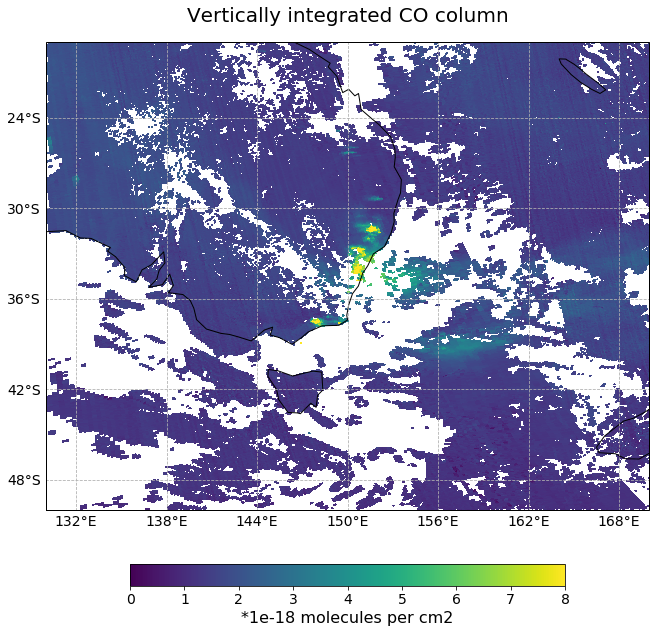

In [13]:
visualize_pcolormesh(s5p_co_converted*1e-18, 
                     s5p_co_converted.longitude, 
                     s5p_co_converted.latitude, 
                     ccrs.PlateCarree(), 
                     'viridis', 
                     '*1e-18 molecules per cm2', 
                     long_name, 
                     0, 8, 
                     130, 170, -50, -19, 
                     log=False, 
                     set_global=False)


<br>

This is the end of the exercise workbook and we hope that you feel more familiar with the Sentinel-5p Level-2 Carbon Monoxide data.

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./11_sentinel5p_L2_load_browse.ipynb"><< 11 - Sentinel-5P - Load and browse</a><span style="float:right;"><a href="./20_sentinel3_OLCI_L1_retrieve.ipynb">20 - Sentinel-3 OLCI Level 1 - Retrieve >></a></span>

<hr>

<img src='./img/all_partners_wekeo.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>